In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from scipy import interpolate as inpo
import qbubble as qb
import time

In [2]:
# Read image, raw contours and raw regions
img = mpimg.imread('data_set/image_train/image_00001.bmp')/255
raw = mpimg.imread('data_set/contour_mask_train/contour_mask_00001.bmp')//255
inmask = mpimg.imread('data_set/interior_mask_train/mask_00001.bmp')//255
h, w = img.shape

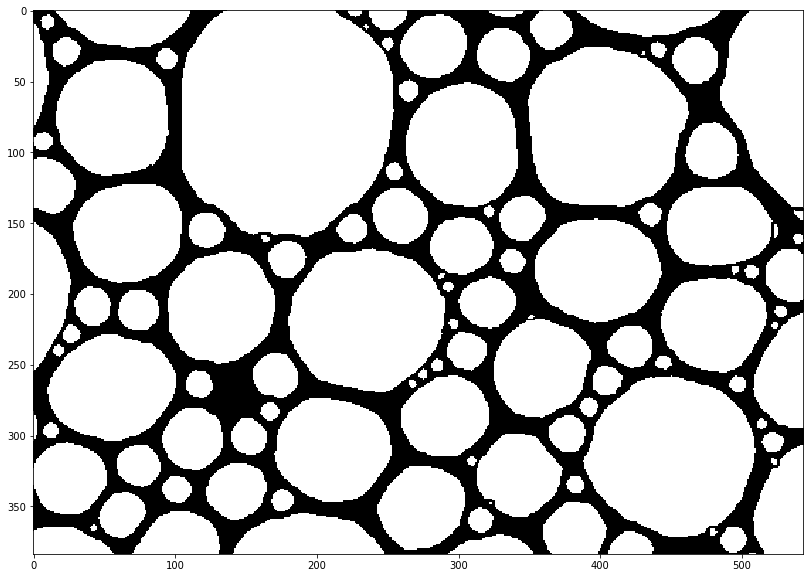

In [3]:
# Plot raw regions
plt.rcParams["figure.figsize"] = (20,10)
plt.imshow(inmask, cmap='gray')

110 regions


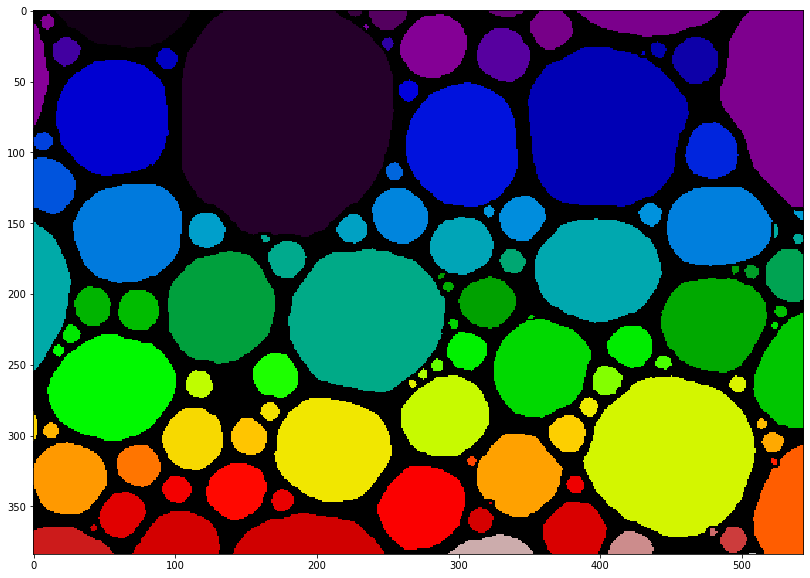

In [4]:
# Plot labeled regions (connected components), get number and areas
labels = qb.qbubbleLabels(inmask)
la0 = qb.qbubbleLabelAreas(labels)
print(len(la0), "regions")
plt.imshow(labels, cmap='nipy_spectral')

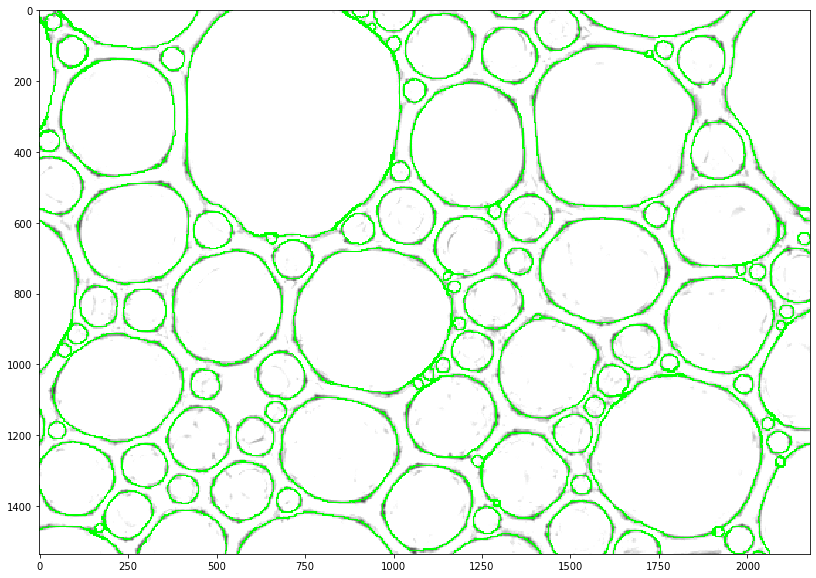

In [5]:
# Plot raw contours over the image
qb.qbubblePlot([], img, s = 4, raw = raw)

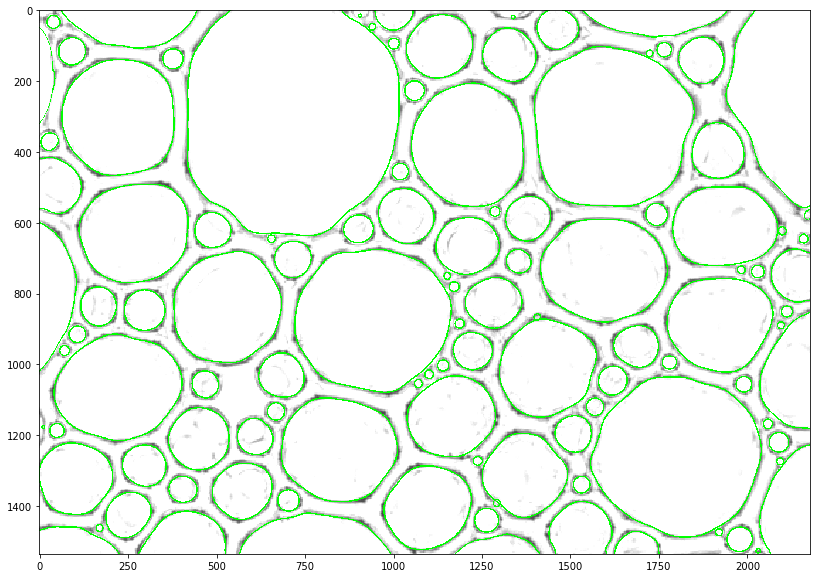

In [6]:
# Turn region boudaries into parametric contours and display them
lv1 = qb. qbubbleLabelsContours(labels)
la1 = qb.qbubbleAreas(lv1, w, h)
qb.qbubblePlot(lv1, img, s = 4, t = 4)

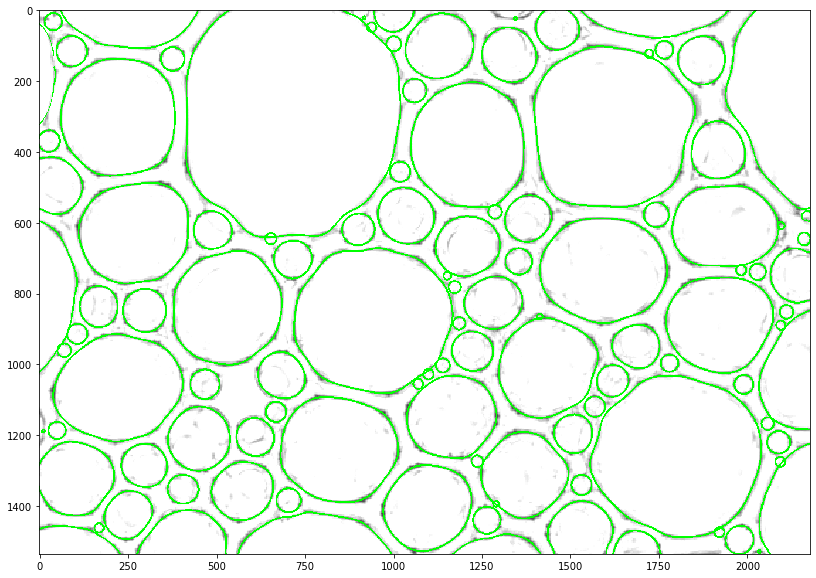

In [11]:
# Refine contours using the image and display them
lv2 = qb.qbubbleRefineContours(lv1, img)
la2 = qb.qbubbleAreas(lv2, w, h)
qb.qbubblePlot(lv2, img, s = 4, t = 4)

In [8]:
# Print region areas
print(np.array(la0))
print(np.array(la1))
print(np.array(la2))

[ 1843 20031    37   302    96   645  1333  6103    77  1631   528    10
  1102   302    54   819    94 10189   172     7  5262   164  5494  1153
   136   968   117  4321  3390  1194   790   199    47    33   508   337
  1420  5082  1900    25    40    25   537  8670   238   852  4706    73
    24    14  1095  3881    41   558   662    57  2101    10    39  3622
    20   121   733   583  5118    49   794    86    59   339    34   290
  2734 10275   109    26   132  4690   130  1467    49   529   512    42
    91   166  2603  2072   717  2105    34    17  1302  2780   301   121
   192   796     4  1344   239  1398  2260    18   843   261    18   393
   557     5]
[ 1854 20023     6   298     6   635  1332  6099    66  1624   507    17
  1090   288    44   808    82 10176   158    18  5256   151  5483  1137
   118   968   109  4306  3379  1186   778   184    39    25   492   323
  1411  5066  1897    25    30    24   527  8660   228   847  4693    62
    21    17  1081  3869    37   542 

In [9]:
# Compute region IoUs
iou12 = qb.qbubbleIoUs(lv1, lv2, w, h)
iou01 = qb.qbubbleIoULabels(labels, lv1, w, h)
iou02 = qb.qbubbleIoULabels(labels, lv2, w, h)

In [10]:
# Print region IoUs
np.set_printoptions(precision=3)
print(np.array(iou01))
print(np.array(iou12))
print(np.array(iou02))

[0.987 0.996 0.103 0.974 0.03  0.966 0.986 0.996 0.857 0.986 0.927 0.588
 0.98  0.947 0.815 0.977 0.872 0.992 0.897 0.389 0.991 0.921 0.991 0.981
 0.868 0.988 0.932 0.991 0.994 0.987 0.958 0.915 0.83  0.611 0.965 0.93
 0.982 0.991 0.99  0.515 0.707 0.815 0.974 0.991 0.95  0.982 0.99  0.849
 0.875 0.722 0.978 0.988 0.902 0.961 0.967 0.86  0.99  0.526 0.8   0.987
 0.952 0.926 0.961 0.966 0.991 0.755 0.967 0.86  0.847 0.936 0.853 0.945
 0.988 0.991 0.881 0.852 0.917 0.992 0.885 0.978 0.02  0.979 0.975 0.833
 0.857 0.928 0.977 0.985 0.976 0.988 0.912 0.842 0.975 0.982 0.95  0.91
 0.938 0.961 0.25  0.984 0.925 0.989 0.989 1.    0.993 0.909 0.8   0.977
 0.977 0.   ]
[0.952 0.981 0.    0.887 0.111 0.918 0.944 0.978 0.569 0.944 0.863 0.486
 0.94  0.785 0.512 0.913 0.678 0.981 0.721 0.692 0.966 0.712 0.969 0.93
 0.652 0.951 0.69  0.969 0.966 0.963 0.932 0.763 0.557 0.639 0.869 0.796
 0.938 0.972 0.952 0.125 0.5   0.511 0.939 0.969 0.823 0.948 0.966 0.585
 0.525 0.708 0.918 0.96  0.627 0.889 0.8